### OSCR Machine Learning in Python

**Linear Regression Module**

**&copy; Kaixin Wang**, Fall 2019



Module/Package import

In [1]:
import numpy as np # numpy module for linear algebra
import pandas as pd # pandas module for data manipulation
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting

In [2]:
import warnings # to handle warning messages
warnings.filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LinearRegression # package for linear model
import statsmodels.api as sm # another package for linear model
import statsmodels.formula.api as smf
import scipy as sp

In [4]:
from sklearn.model_selection import train_test_split # split data into training and testing sets

Dataset import

The dataset that we will be using is the `meuse` dataset.

As described by the author of the data: "This data set gives locations and topsoil heavy metal concentrations, along with a number of soil and landscape variables at the observation locations, collected in a flood plain of the river Meuse, near the village of Stein (NL). Heavy metal concentrations are from composite samples of an area of approximately 15 m $\times$ 15 m."

In [5]:
soil = pd.read_csv("soil.csv")  # data import
soil.head() # check if read in correctly

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,11.7,85,299,1022,7.909,0.001358,13.6,1,1,1,Ah,50
1,181025,333558,8.6,81,277,1141,6.983,0.012224,14.0,1,1,1,Ah,30
2,181165,333537,6.5,68,199,640,7.800,0.103029,13.0,1,1,1,Ah,150
3,181298,333484,2.6,81,116,257,7.655,0.190094,8.0,1,2,0,Ga,270
4,181307,333330,2.8,48,117,269,7.480,0.277090,8.7,1,2,0,Ah,380


In [6]:
index = pd.isnull(soil).any(axis = 1)
soil = soil[-index]
soil = soil.reset_index(drop = True)

In [7]:
# size of the dataset
n = soil.shape[1]

Variable Selection and Modeling

In [8]:
(soil.corr()["lead"]).sort_values()

elev      -0.584323
dist.m    -0.584204
dist      -0.576577
soil      -0.430423
ffreq     -0.399238
x         -0.158104
y          0.069192
lime       0.501632
om         0.547836
cadmium    0.800898
copper     0.817000
zinc       0.954303
lead       1.000000
Name: lead, dtype: float64

Based on visualization in the previous post as well as the sorted correlation between lead and the predictors:
    
- `cadmium`, `copper`, `zinc` and `om` seem to have strong **positive** correlation with lead
- `elev`, `dist` and `dist.m` seem to have strong **negative** correlation with lead
- categorical variable `lime` seems to be a good indicator predictor variable

Therefore, we now build a linear model using 6 predictors: `cadmium`, `copper`, `zinc`, `elev`, `dist` and `lime`.

In [9]:
variables = ["cadmium", "copper", "zinc", "elev", "dist",  "lime"]

In [10]:
x = soil[variables]
y = soil["lead"]

#### Modeling - building a linear model

split the dataset into training and testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

build a linear model using `sklearn` package

In [12]:
model = LinearRegression().fit(X_train, y_train)

In [13]:
# R^2 on training set
R2_train = model.score(X_train, y_train)
R2_train

0.9483947080189404

In [14]:
# R^2 on testing set
R2_test = model.score(X_test, y_test)
R2_test

0.964901551899052

In [15]:
# value of intercepts
for var, coef in zip(variables, model.coef_):
    print(var, coef)

cadmium -13.39199000210099
copper 0.053658632763891025
zinc 0.423465844858694
elev -3.253112769849327
dist 14.509965024252311
lime -23.51405840547695


build a linear model using `statsmodel` package

In [16]:
df_train = pd.concat([X_train, y_train], axis = 1) # build a dataframe for training set

In [17]:
model_smf = smf.ols("lead ~ cadmium + copper + zinc + elev + lime", data = df_train)

In [18]:
results = model_smf.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lead   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     346.6
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           2.35e-59
Time:                        22:07:35   Log-Likelihood:                -467.76
No. Observations:                 101   AIC:                             947.5
Df Residuals:                      95   BIC:                             963.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8739     27.200      0.878      0.3

diagnostics plots

In [19]:
# diagnosticsPlots function definition
def diagnosticsPlots(predictions, truevalues):
    '''
    This function will plot the following two diagonistics plots:
    1. residuals vs. fitted values plot (plot on the left)
    2. qqplot of the residuals (plot on the right)
    
    parameters required:
    - predictions: predicted values using the linear regression model
    - truevalues:  true values of the response variable
    
    required modules/packages:
    - matplotlib.pyplot (plt)
    - scipy (sp)
    
    Author: Kaixin Wang
    Created: October 2019
    '''
    residuals = truevalues - predictions
    fig, axs = plt.subplots(figsize = (12, 2.5))
    plt.subplot(1, 2, 1)
    # residuals vs. fitted values
    plt.scatter(predictions, residuals)
    plt.plot(predictions, np.tile(np.mean(residuals), residuals.shape[0]), "r-")
    plt.xlim([np.min(predictions) - 2.5, np.max(predictions) + 2.5])
    plt.title("residuals vs. fitted values")
    plt.ylabel("residuals")
    plt.xlabel("fitted values")
    plt.legend(["E[residuals]"])
    print("Average of residuals: ", np.mean(residuals))
    # qqplot
    plot = plt.subplot(1, 2, 2)
    sp.stats.probplot(residuals, plot = plot, fit = True)
    plt.show()

Average of residuals:  -8.397770927493382e-13


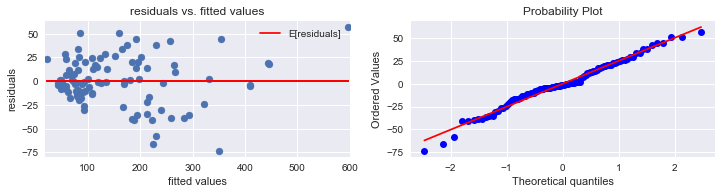

In [20]:
pred_val = results.fittedvalues.copy()
true_val = y_train.copy()
diagnosticsPlots(pred_val, true_val)

training and testing Root-Mean-Square Error (RMSE)

The root-mean-square error of a prediction is calcuated as the following:

$$\text{RMSE} = \frac{\sqrt{\sum_{i=1}^n (y_i - \hat {y_i}) ^ 2}}{n}$$

where $y_i$ is the true value of the response, $\hat {y_i}$ is the fitted value of the response, n is the size of the input

In [21]:
def RMSETable(train_y, train_fitted, train_size, train_R2, test_y, test_fitted, test_size, test_R2):
    '''
    This function creates a function that returns a dataframe in the following format:
    -------------------------------------------------
                     RMSE     R-squared    size 
    training set  train_RMSE  train_R2    n_training
    testing set   test_RMSE   tesint_R2   n_testing
    -------------------------------------------------
    
    parameters required:
    - train_y: true values of the response in the training set
    - train_fitted: fitted values of the response in the training set
    - train_size: size of the training set
    - train_R2: R-squared on the training set
    - test_y: true values of the response in the testing set
    - test_fitted: fitted values of the response in the testing set
    - test_size: size of the testing size
    - test_R2: R-squared on the testing set
    
    Author: Kaixin Wang
    Created: October 2019
    '''
    train_RMSE = np.sqrt(sum(np.power(train_y - train_fitted, 2))) / train_size
    test_RMSE  = np.sqrt(sum(np.power(test_y  - test_fitted, 2))) / test_size
    train = [train_RMSE, train_size, train_R2]
    test  = [test_RMSE,  test_size,  test_R2]
    return pd.DataFrame([train, test], index = ["training set", "testing set"], columns = ["RMSE", "R-squared", "size"])

In [22]:
table1 = RMSETable(y_train.values, model.predict(X_train), R2_train, len(y_train), 
                   y_test.values, model.predict(X_test), R2_test, len(y_test))
print(table1)

                    RMSE  R-squared  size
training set  262.286912   0.948395   101
testing set   159.247070   0.964902    51


#### Model selection

Since we are using 6 predictor variables for 152 entries, we can consider using fewer predictors to improve the $R_{adj}^2$, where is a version of $R^2$ that penalizes model complexity.

Selecting fewer predictor will also help with preventing the issue of overfitting.

Therefore, observing that `zinc`, `copper` and `cadmium` are the top three predictors that have the highest correlation with `lead`: we now build a model using only these three predictors.

using `sklearn` linear regression module

In [23]:
variables = ["cadmium", "copper", "zinc"]
x = soil[variables]
y = soil["lead"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [24]:
model2 = LinearRegression().fit(X_train, y_train)
# R^2 on training set
R2_train = model2.score(X_train, y_train)
print("Training set R-squared", R2_train)
# R^2 on testing set
R2_test = model2.score(X_test, y_test)
print("Testing set R-squared", R2_test)

Training set R-squared 0.9424059338188305
Testing set R-squared 0.954472865577916


In [25]:
# value of intercepts
for var, coef in zip(variables, model2.coef_):
    print(var, coef)

cadmium -14.916823671628368
copper -0.04180596932245491
zinc 0.42490749819042956


using `statsmodel` ordinary linear regrssion module

In [26]:
df_train = pd.concat([X_train, y_train], axis = 1) # build a dataframe for training set
model_smf = smf.ols("lead ~ cadmium + copper + zinc", data = df_train)
results = model_smf.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   lead   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     529.1
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           5.81e-60
Time:                        22:07:37   Log-Likelihood:                -472.96
No. Observations:                 101   AIC:                             953.9
Df Residuals:                      97   BIC:                             964.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0363      6.989      0.434      0.6

diagnostics plots

Average of residuals:  -1.3338505217833169e-12


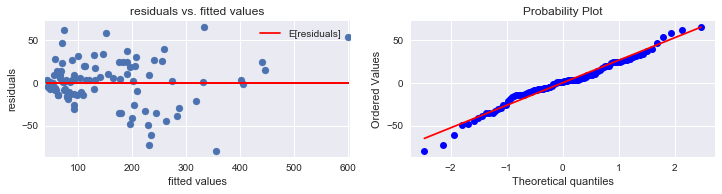

In [27]:
pred_val = results.fittedvalues.copy()
true_val = y_train.copy()
diagnosticsPlots(pred_val, true_val)

In [28]:
table2 = RMSETable(y_train.values, model2.predict(X_train), R2_train, len(y_train), 
                   y_test.values, model2.predict(X_test), R2_test, len(y_test))
print(table2)

                    RMSE  R-squared  size
training set  278.849250   0.942406   101
testing set   183.350488   0.954473    51


#### model evaluation and comparison

- model with 5 predictors (full model)

In [29]:
print(table1)

                    RMSE  R-squared  size
training set  262.286912   0.948395   101
testing set   159.247070   0.964902    51


- model with 3 predictors (reduced model)

In [30]:
print(table2)

                    RMSE  R-squared  size
training set  278.849250   0.942406   101
testing set   183.350488   0.954473    51


Comparing the tables obtained above:

- The full model with 6 predictors has lower test RMSE and higher $R^2$ value than the reduced model with 3 predictors 
- However, a higher $R^2$ doesn't mean that we favor the full model, since $R^2$ will always increase as the number of predictors used increases. Instead, we will take a look at $R^2_{adj}$, the adjusted $R^2$, which is calculated as 

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - p - 1}$$

where $n$ is the sample size and $p$ is the number of predictors used in the model.

- Since $R^2_{adj}$ of the full model is 0.945, while the $R^2_{adj}$ of the reduced model is 0.941, we observe that the model doens't obtain very much improvement by adding three additional predictors.

#### Summary of the module

By building two linear regression models using 6 and 3 predictors respectively, we observe that predictor variables `cadmium`, `copper` and `zinc` have very strong positive correlation with the response variable `lead`. In addition, we also observed that by adding three more predictors, `dist`, `elev` and `lime`, the $R^2_{adj}$ didn't get much improvement comparing to the model with only 3 predictors.

Therefore, the final model that we decided to adopt is the reduced model with 3 predictors:

$$\text{Lead} \sim \text{Cadmium} + \text{Copper} + \text{Zinc}$$

Reference:

Dataset: `meuse` dataset

- P.A. Burrough, R.A. McDonnell, 1998. Principles of Geographical Information Systems. Oxford University Press.
- Stichting voor Bodemkartering (STIBOKA), 1970. Bodemkaart van Nederland : Blad 59 Peer, Blad 60 West en 60 Oost Sittard: schaal 1 : 50 000. Wageningen, STIBOKA.

To access this dataset in `R`:

```
install.packages("sp")
library(sp)
data(meuse)
```

**&copy; Kaixin Wang**, updated October 2019